In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.4.0+cu118


In [2]:
import numpy as np  
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
# Helper function for visualizations
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora',
                    transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(
    f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

# Print information about a specific node (node 0 in this case)
node_index = 0  # You can change this index to inspect different nodes

print(f'\nInformation of node {node_index}:')
print('---------------------------------')
# Print the feature vector of node 0
print(f'Feature vector: {data.x[node_index]}')
print(f'Label: {data.y[node_index]}')  # Print the label (class) of node 0
# Check if it's a training node
print(f'Training node: {data.train_mask[node_index]}')
# Check if it's a validation node
print(f'Validation node: {data.val_mask[node_index]}')
print(f'Test node: {data.test_mask[node_index]}')  # Check if it's a test node


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True

Information of node 0:
---------------------------------
Feature vector: tensor([0., 0., 0.,  ..., 0., 0., 0.])
Label: 3
Training node: True
Validation node: False
Test node: False


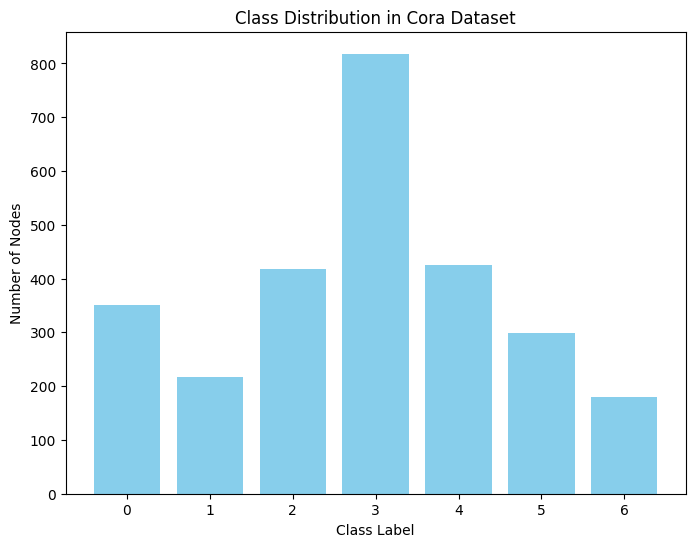


Class distribution:
Class 3: 818 nodes
Class 4: 426 nodes
Class 0: 351 nodes
Class 2: 418 nodes
Class 1: 217 nodes
Class 5: 298 nodes
Class 6: 180 nodes

Percentage of nodes in each class:
Class 3: 30.21%
Class 4: 15.73%
Class 0: 12.96%
Class 2: 15.44%
Class 1: 8.01%
Class 5: 11.00%
Class 6: 6.65%


In [5]:
from collections import Counter

# Count the occurrences of each class label in the dataset
class_counts = Counter(data.y.tolist())

# Extract classes and their respective counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Nodes')
plt.title('Class Distribution in Cora Dataset')
plt.xticks(classes)  # Set the x-axis to show class labels
plt.show()

# Check if the distribution is balanced
print("\nClass distribution:")
for class_label, count in class_counts.items():
    print(f'Class {class_label}: {count} nodes')

# Optionally, check the percentage of nodes in each class
total_nodes = data.num_nodes
print("\nPercentage of nodes in each class:")
for class_label, count in class_counts.items():
    percentage = (count / total_nodes) * 100
    print(f'Class {class_label}: {percentage:.2f}%')

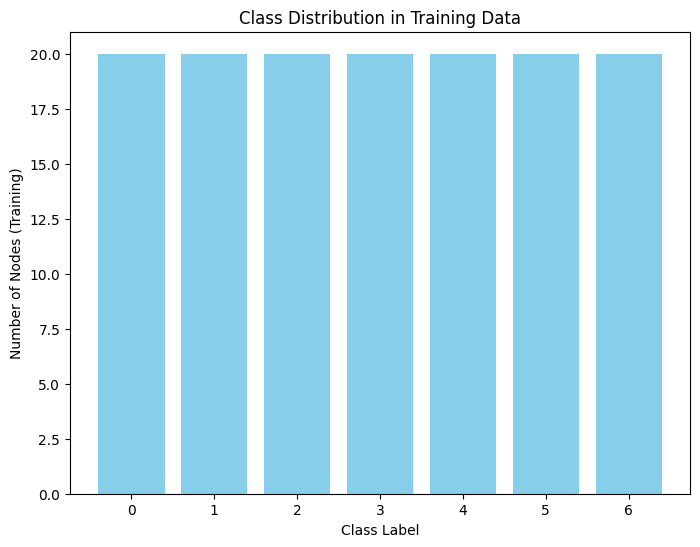

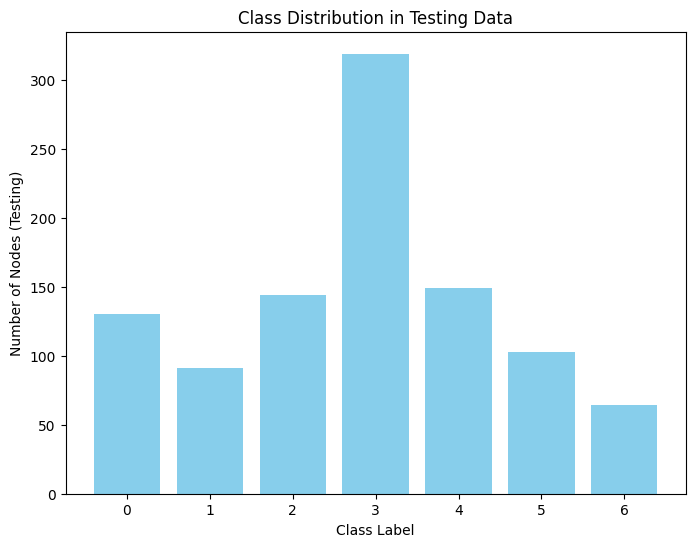


Training class distribution:
Class 3: 20 nodes
Class 4: 20 nodes
Class 0: 20 nodes
Class 2: 20 nodes
Class 1: 20 nodes
Class 5: 20 nodes
Class 6: 20 nodes

Testing class distribution:
Class 3: 319 nodes
Class 2: 144 nodes
Class 0: 130 nodes
Class 1: 91 nodes
Class 5: 103 nodes
Class 4: 149 nodes
Class 6: 64 nodes

Percentage of nodes in each class (Training):
Class 3: 14.29%
Class 4: 14.29%
Class 0: 14.29%
Class 2: 14.29%
Class 1: 14.29%
Class 5: 14.29%
Class 6: 14.29%

Percentage of nodes in each class (Testing):
Class 3: 31.90%
Class 2: 14.40%
Class 0: 13.00%
Class 1: 9.10%
Class 5: 10.30%
Class 4: 14.90%
Class 6: 6.40%


In [6]:
from collections import Counter

# Extract class labels for training and testing nodes
train_labels = data.y[data.train_mask].tolist()
test_labels = data.y[data.test_mask].tolist()

# Count the occurrences of each class in training and testing data
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Plotting function for class distribution


def plot_class_distribution(class_counts, dataset_type):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class Label')
    plt.ylabel(f'Number of Nodes ({dataset_type})')
    plt.title(f'Class Distribution in {dataset_type} Data')
    plt.xticks(classes)
    plt.show()


# Plot the class distribution for training data
plot_class_distribution(train_class_counts, 'Training')

# Plot the class distribution for testing data
plot_class_distribution(test_class_counts, 'Testing')

# Check if the distribution is balanced in training and testing
print("\nTraining class distribution:")
for class_label, count in train_class_counts.items():
    print(f'Class {class_label}: {count} nodes')

print("\nTesting class distribution:")
for class_label, count in test_class_counts.items():
    print(f'Class {class_label}: {count} nodes')

# Optionally, check the percentage of nodes in each class for training and testing
total_train_nodes = int(data.train_mask.sum())
total_test_nodes = int(data.test_mask.sum())

print("\nPercentage of nodes in each class (Training):")
for class_label, count in train_class_counts.items():
    percentage = (count / total_train_nodes) * 100
    print(f'Class {class_label}: {percentage:.2f}%')

print("\nPercentage of nodes in each class (Testing):")
for class_label, count in test_class_counts.items():
    percentage = (count / total_test_nodes) * 100
    print(f'Class {class_label}: {percentage:.2f}%')

In [7]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(456133)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x


model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [8]:
model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
# Define optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x)  # Perform a single forward pass.
    # Compute the loss solely based on the training nodes.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss


def test():
    model.eval()
    out = model(data.x)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    # Check against ground-truth labels.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    # Derive ratio of correct predictions.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc


for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9511
Epoch: 002, Loss: 1.9480
Epoch: 003, Loss: 1.9422
Epoch: 004, Loss: 1.9376
Epoch: 005, Loss: 1.9326
Epoch: 006, Loss: 1.9248
Epoch: 007, Loss: 1.9223
Epoch: 008, Loss: 1.9113
Epoch: 009, Loss: 1.8999
Epoch: 010, Loss: 1.8956
Epoch: 011, Loss: 1.8814
Epoch: 012, Loss: 1.8785
Epoch: 013, Loss: 1.8686
Epoch: 014, Loss: 1.8599
Epoch: 015, Loss: 1.8345
Epoch: 016, Loss: 1.8329
Epoch: 017, Loss: 1.8260
Epoch: 018, Loss: 1.8045
Epoch: 019, Loss: 1.7843
Epoch: 020, Loss: 1.7721
Epoch: 021, Loss: 1.7494
Epoch: 022, Loss: 1.7420
Epoch: 023, Loss: 1.7271
Epoch: 024, Loss: 1.7377
Epoch: 025, Loss: 1.6855
Epoch: 026, Loss: 1.6692
Epoch: 027, Loss: 1.6410
Epoch: 028, Loss: 1.6198
Epoch: 029, Loss: 1.6335
Epoch: 030, Loss: 1.5627
Epoch: 031, Loss: 1.5746
Epoch: 032, Loss: 1.5494
Epoch: 033, Loss: 1.5119
Epoch: 034, Loss: 1.5170
Epoch: 035, Loss: 1.4876
Epoch: 036, Loss: 1.4624
Epoch: 037, Loss: 1.4725
Epoch: 038, Loss: 1.4052
Epoch: 039, Loss: 1.4110
Epoch: 040, Loss: 1.3381


In [9]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5810


In [10]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(456133)
        
        ''' Comment this out for 1 layer '''
        # Single GCNConv layer
        # This is an initialization step
        self.conv1 = GCNConv(dataset.num_features, dataset.num_classes)
        ''' End comment '''

        ''' Comment this out for 2 layers '''
        # self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        # self.conv2 = GCNConv(hidden_channels, dataset.num_classes)
        ''' End Comment '''

        ''' Comment this out for 3 layes '''
        # # Second GCNConv layer (added layer)
        # self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # # Third GCNConv layer (output layer)
        # self.conv3 = GCNConv(hidden_channels, dataset.num_classes)
        ''' End Comment '''
     

    def forward(self, x, edge_index):
        # Here we are passing in the actual data
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training) 

        ''' Comment out for 2 layers '''
        # x = self.conv2(x, edge_index)
        ''' End Comment '''

        ''' Comment out this section for 3 layers '''
        # # Second convolution + activation + dropout
        # x = self.conv2(x, edge_index)
        # x = x.relu()
        # x = F.dropout(x, p=0.5, training=self.training)

        # # Final convolution (output layer)
        # x = self.conv3(x, edge_index)
        ''' End Comment '''

        return x

print(data.edge_index)

model = GCN(hidden_channels=16)
print(model)

tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])
GCN(
  (conv1): GCNConv(1433, 7)
)


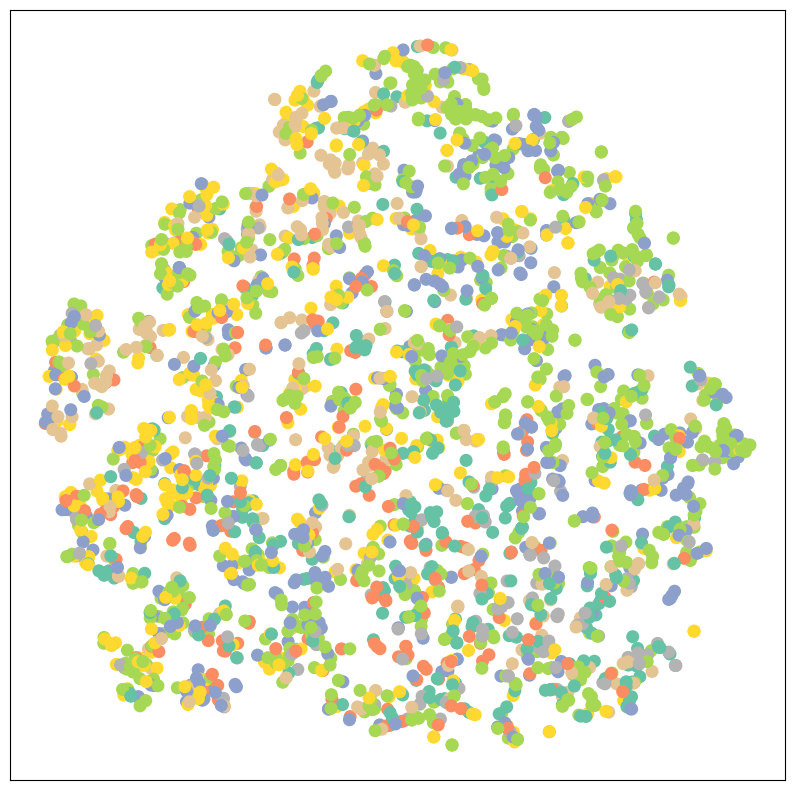

In [11]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [12]:
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.09, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
# criterion = torch.nn.KLDivLoss()
# criterion = torch.nn.MSELoss()


def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    ''' Comment our for the KLDivLoss Function'''
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    ''' End of comment '''

    ''' Additional changes here to accomodate for the KLDivLoss function '''
    # # Apply softmax to get probabilities. Since KLDivLoss expects a probability distribution where the outputs sum to 1
    # # Perform a forward pass.
    # out = model(data.x, data.edge_index)

    # # Compute the output for training nodes only.
    # out_train = out[data.train_mask]

    # # Apply softmax to the model's output to get probability distribution
    # # KLDivLoss expects log-probabilities
    # out_prob = F.log_softmax(out_train, dim=1)

    # # Convert the target labels to one-hot encoding and normalize them (as a probability distribution)
    # target = F.one_hot(data.y[data.train_mask],
    #                    num_classes=dataset.num_classes).float()

    # # Compute the loss based on the log probabilities and the one-hot encoded targets
    # loss = criterion(out_prob, target)
    ''' End changes for KLDivLoss function'''

    ''' Additional changes here to accomodate for MSELoss'''
    # # Compute the output only for the training nodes
    # out_train = out[data.train_mask]

    # # Convert the target labels to one-hot encoding
    # target = F.one_hot(data.y[data.train_mask],
    #                    num_classes=dataset.num_classes).float()

    # # Compute the loss solely based on the training nodes.
    # loss = criterion(out_train, target)
    ''' End changes for MSELoss functions'''

    ''' Comment out to allow other loss functions to take effect'''
    # Compute the loss solely based on the training nodes.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    ''' End of Comment '''
    
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss


def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    # Check against ground-truth labels.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    # Derive ratio of correct predictions.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc


losses= []
for epoch in range(1, 401):
    loss = train()
    losses.append(loss)  # Track the loss for each epoch
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9454
Epoch: 002, Loss: 1.9217
Epoch: 003, Loss: 1.8943
Epoch: 004, Loss: 1.8792
Epoch: 005, Loss: 1.8935
Epoch: 006, Loss: 1.8756
Epoch: 007, Loss: 1.8347
Epoch: 008, Loss: 1.8255
Epoch: 009, Loss: 1.8278
Epoch: 010, Loss: 1.8130
Epoch: 011, Loss: 1.8205
Epoch: 012, Loss: 1.8973
Epoch: 013, Loss: 1.8285
Epoch: 014, Loss: 1.7688
Epoch: 015, Loss: 1.8134
Epoch: 016, Loss: 1.7725
Epoch: 017, Loss: 1.8404
Epoch: 018, Loss: 1.8077
Epoch: 019, Loss: 1.8560
Epoch: 020, Loss: 1.7973
Epoch: 021, Loss: 1.7933
Epoch: 022, Loss: 1.8477
Epoch: 023, Loss: 1.7991
Epoch: 024, Loss: 1.7892
Epoch: 025, Loss: 1.8005
Epoch: 026, Loss: 1.7974
Epoch: 027, Loss: 1.7867
Epoch: 028, Loss: 1.7964
Epoch: 029, Loss: 1.8395
Epoch: 030, Loss: 1.8513
Epoch: 031, Loss: 1.8139
Epoch: 032, Loss: 1.8569
Epoch: 033, Loss: 1.8139
Epoch: 034, Loss: 1.8335
Epoch: 035, Loss: 1.7922
Epoch: 036, Loss: 1.8011
Epoch: 037, Loss: 1.8557
Epoch: 038, Loss: 1.7936
Epoch: 039, Loss: 1.7719
Epoch: 040, Loss: 1.8181


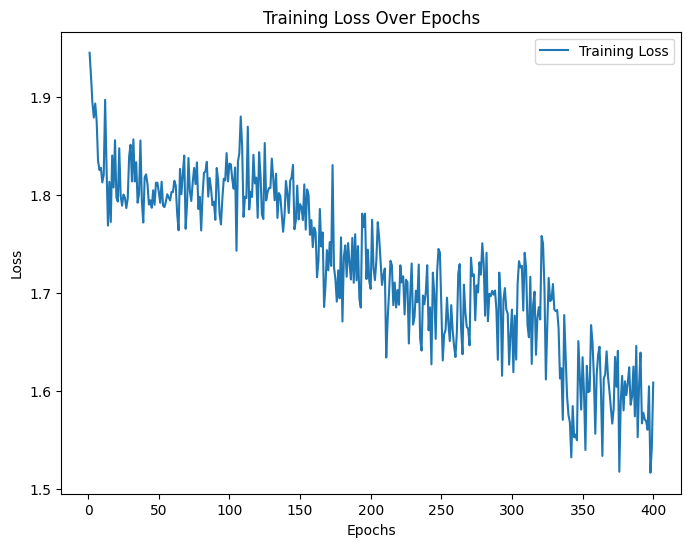

In [13]:
# Convert tensor losses to float values
losses_float = [loss.item() for loss in losses]

# Plot the training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, 401), losses_float, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [14]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7590


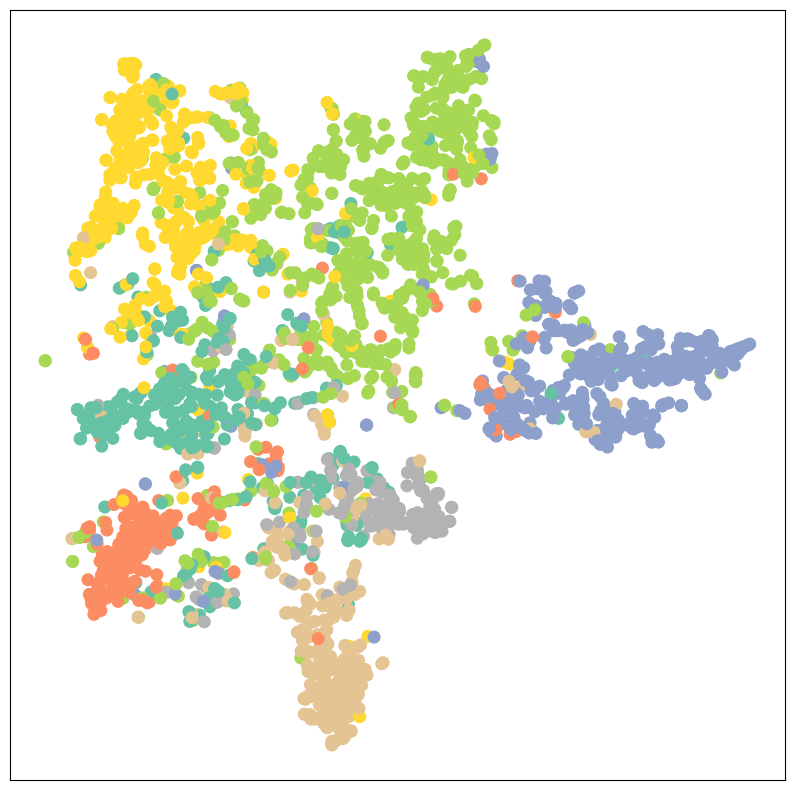

In [15]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

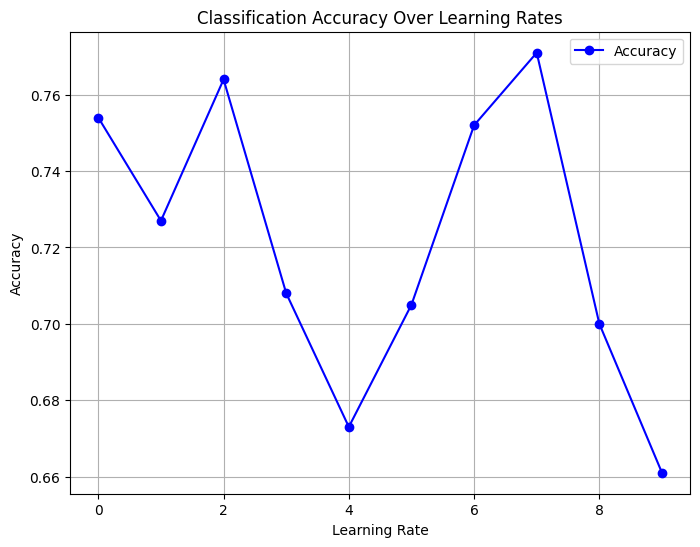

In [16]:
# Your classification accuracy values
accuracies_lr = [0.7540, 0.7270, 0.7640, 0.7080,
              0.6730, 0.7050, 0.7520, 0.7710, 0.7000, 0.6610]
accuracies_epochs = [0.6900, 0.7790, 0.6110, 0.7700, 0.7540]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(accuracies_lr, marker='o',
         linestyle='-', color='b', label='Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Over Learning Rates')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.datasets import Planetoid
import numpy as np

# Sigmoid activation function


def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU


def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function for converting logits to probabilities


def softmax(x):
    # Stability trick to prevent overflow
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss


def cross_entropy_loss(predictions, targets):
    m = targets.shape[0]
    log_likelihood = -np.log(predictions[range(m), targets])
    loss = np.sum(log_likelihood) / m
    return loss

# One-hot encoding for the labels


def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

# Backpropagation for the cross-entropy loss


def cross_entropy_derivative(predictions, targets):
    m = targets.shape[0]
    grad = predictions
    grad[range(m), targets] -= 1
    grad = grad / m
    return grad


class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(456133)
        # Initialize weights and biases
        # Weights for first layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))  # Biases for first layer
        # Weights for second layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))  # Biases for second layer

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1  # Linear transformation
        self.A1 = relu(self.Z1)  # ReLU activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # Output logits
        self.A2 = softmax(self.Z2)  # Softmax to get class probabilities
        return self.A2

    def backward(self, X, y, learning_rate=0.01):
        # Backward pass
        m = X.shape[0]

        # Compute gradients for the output layer
        # Gradient of loss wrt output logits
        dZ2 = cross_entropy_derivative(self.A2, y)
        dW2 = np.dot(self.A1.T, dZ2) / m  # Gradient of loss wrt W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Gradient of loss wrt b2

        # Backprop through first layer
        # Gradient wrt activations of the first layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)  # Gradient wrt Z1
        dW1 = np.dot(X.T, dZ1) / m  # Gradient wrt W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Gradient wrt b1

        # Gradient descent update
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

        print("Gradients for W1:", self.W1)
        print("Gradients for W2:", self.W2)

    def compute_loss(self, y_true, y_pred):
        return cross_entropy_loss(y_pred, y_true)

    def predict(self, X):
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)


# # Dataset setup (dummy dataset similar to Cora)
# np.random.seed(456133)
# num_features = 1433  # Example input feature size
# num_classes = 7  # Number of output classes
# num_samples = 1000  # Number of samples

# # Random dataset with inputs and labels
# X = np.random.randn(num_samples, num_features)
# y = np.random.randint(0, num_classes, size=num_samples)

# # Train-test split
# train_size = int(0.8 * num_samples)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]


# Load the Cora dataset and normalize features
dataset = Planetoid(root='data/Planetoid', name='Cora',
                    transform=NormalizeFeatures())
data = dataset[0]  # Get the first graph object (Cora is a single graph)

# Convert PyTorch Geometric tensors to NumPy arrays
X = data.x.numpy()  # Feature matrix
y = data.y.numpy()  # Labels

# Train-test split
train_mask = data.train_mask.numpy()  # Boolean mask for training nodes
test_mask = data.test_mask.numpy()    # Boolean mask for testing nodes

X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[test_mask]
y_test = y[test_mask]
num_features = dataset.num_features
num_classes = dataset.num_classes

print(f"Train set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")

# Initialize model
model = MLP(input_size=num_features, hidden_size=16, output_size=num_classes)

# Training loop
epochs = 400
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    outputs = model.forward(X_train)

    # Compute loss
    loss = model.compute_loss(y_train, outputs)

    # Backward pass and update weights
    model.backward(X_train, y_train, learning_rate)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

# Testing
y_pred = model.predict(X_test)
test_acc = np.mean(y_pred == y_test)  # Compute test accuracy
print(f'Test Accuracy: {test_acc:.4f}')

Train set size: 140
Test set size: 1000
Gradients for W1: [[-0.00348334  0.00034336 -0.01331687 ... -0.00703107 -0.0080432
   0.00081251]
 [ 0.00910314  0.00654935  0.00727744 ...  0.01271381  0.01102482
   0.00180324]
 [-0.00809501 -0.00964288  0.01136197 ...  0.00380619  0.000661
   0.00095277]
 ...
 [ 0.01223482 -0.01728818 -0.00231756 ...  0.00237527 -0.00421919
   0.01429114]
 [-0.01076112  0.01430026  0.01151892 ...  0.00186883 -0.00917517
   0.00336926]
 [ 0.00154185 -0.00278584  0.0129874  ... -0.00412461 -0.0016712
  -0.00671819]]
Gradients for W2: [[-6.77977419e-04  1.25706986e-02 -4.38194322e-03  1.00640744e-03
  -8.80297614e-03 -3.85688867e-03  8.86100216e-03]
 [ 5.67076373e-04  5.87158969e-03 -1.58514902e-02 -7.30535054e-03
  -1.92151368e-02 -5.48352584e-03 -5.43669640e-03]
 [-1.00255841e-02  1.00652585e-03 -2.10944864e-03 -1.90660259e-03
  -2.04341544e-03 -7.68710362e-03 -2.55763444e-03]
 [ 3.34181671e-03  7.05038694e-06  8.27319777e-03 -8.86846600e-03
  -1.07623407e-02 -